In [1]:
%load_ext autoreload

In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [4]:
sys.path.append(MODULES_PATH)

In [5]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer

In [6]:
experiment_path = os.path.join(METRICS_PATH, "28_07_2021_y_gal_samples")
metrics_handler = ExperimentSuitMetrics(experiment_path)

In [7]:
dtypes = {
    "labeled_pool_size": int,
    "eval_accuracy": float,
    "eval_loss": float,
    "query_time": float
}

In [9]:
# df_sample_base = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_1_", dtype=dtypes)
df_sample_5 = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_5_max_entropy", dtype=dtypes)
df_sample_15 = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_15_max_entropy", dtype=dtypes)
df_sample_25 = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_25_max_entropy", dtype=dtypes)

In [10]:
# df_sample_base.insert(0, "sample_size", 1)
df_sample_5.insert(0, "sample_size", 5)
df_sample_15.insert(0, "sample_size", 15)
df_sample_25.insert(0, "sample_size", 25)

In [11]:
merged = pd.concat([df_sample_5, df_sample_15, df_sample_25])

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

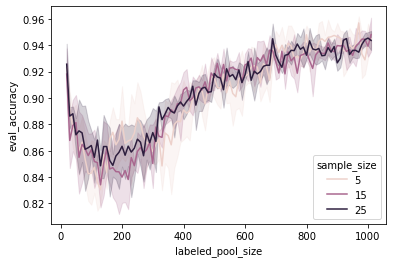

In [12]:
sns.lineplot(data=merged, y="eval_accuracy", x="labeled_pool_size", hue="sample_size")

In [37]:
df_sample_5.dtypes

sample_size                            int64
run                                   object
model                                 object
method                                object
train_loss                            object
train_sparse_categorical_accuracy     object
train_time                            object
query_time                           float64
eval_loss                            float64
eval_accuracy                        float64
eval_time                             object
iteration                             object
labeled_pool_size                      int64
unlabeled_pool_size                   object
dtype: object

In [47]:
dtypes = {
    "sample_size": int,
    "query_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "labeled_pool_size": int
}
columns = ["iteration", "sample_size", "query_time", "eval_loss", "eval_accuracy", "labeled_pool_size"]
df_sample_5_mean = MetricsTransformer.mean(df_sample_5, columns, dtype=dtypes)
df_sample_15_mean = MetricsTransformer.mean(df_sample_15, columns, dtype=dtypes)
df_sample_25_mean = MetricsTransformer.mean(df_sample_25, columns, dtype=dtypes)

Text(0.5, 1.0, '#Samples=25')

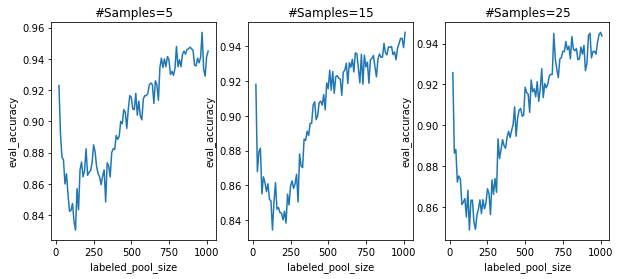

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

sns.lineplot(ax=axes[0], data=df_sample_5_mean, y="eval_accuracy", x="labeled_pool_size")
axes[0].set_title("#Samples=5")

sns.lineplot(ax=axes[1], data=df_sample_15_mean, y="eval_accuracy", x="labeled_pool_size")
axes[1].set_title("#Samples=15")

sns.lineplot(ax=axes[2], data=df_sample_25_mean, y="eval_accuracy", x="labeled_pool_size")
axes[2].set_title("#Samples=25")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

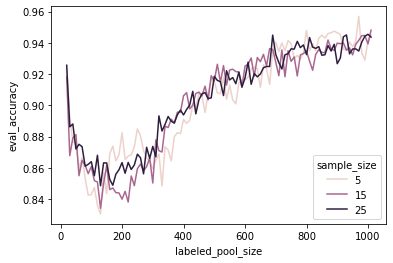

In [50]:
sns.lineplot(data=pd.concat([df_sample_5_mean, df_sample_15_mean, df_sample_25_mean]), y="eval_accuracy", x="labeled_pool_size", hue="sample_size")

NameError: name 'df_sample_base' is not defined

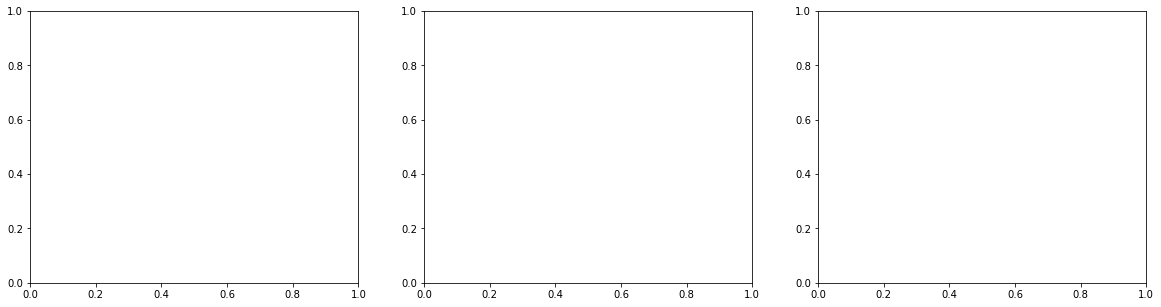

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.lineplot(data=pd.concat([df_sample_base, df_sample_5]), ax=axes[0], y="eval_accuracy", x="labeled_pool_size", hue="sample_size")
sns.lineplot(data=pd.concat([df_sample_base, df_sample_15]), ax=axes[1], y="eval_accuracy", x="labeled_pool_size", hue="sample_size")
sns.lineplot(data=pd.concat([df_sample_base, df_sample_25]), ax=axes[2], y="eval_accuracy", x="labeled_pool_size", hue="sample_size")